In [96]:
import networkx as nx
import json
import matplotlib.pyplot as plt
from operator import itemgetter
import pandas

In [215]:
def draw(G) :
    return nx.draw_networkx(G,
                 pos=nx.spring_layout(G),
                 alpha = 0.6, # transparence
                 node_size = [G.degree(node)*15 for node in G.nodes()],
                )

### Load data

In [216]:
nodepath = 'eldenring/ER_nodes.json'
edgepath = 'eldenring/ER_dir_edges.json'

In [217]:
with open(nodepath, mode = 'r', encoding='utf-8') as f:
    nodes = json.load(f)

In [218]:
with open(edgepath, mode = 'r', encoding='utf-8') as g :
    edges = json.load(g)

### Create Directed Graph

In [219]:
Gd = nx.DiGraph()

In [220]:
nodes_clean = []
for node in nodes:
    newnode = (node['id'], node)
    nodes_clean.append(newnode)
len(nodes_clean)

314

In [221]:
edges_clean = []
for edge in edges:
    for dest in edge['dest']:
        newedge = (edge['origin'], dest)
        edges_clean.append(newedge)
len(edges_clean)

720

In [222]:
Gd.add_nodes_from(nodes_clean)

In [223]:
Gd.add_edges_from(edges_clean)

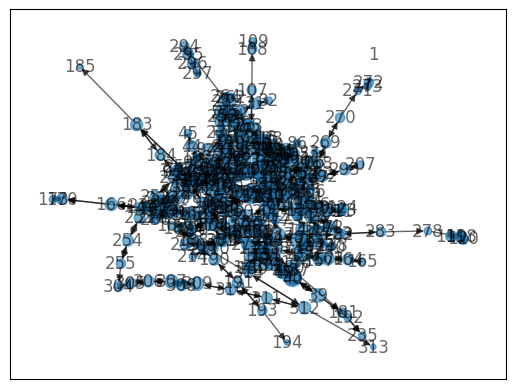

In [224]:
draw(Gd)

### Compute measures

In [227]:
G2 = nx.Graph(Gd)

In [228]:
nx.is_connected(G2)

False

In [229]:
Gcc = sorted(nx.connected_components(G2), key=len, reverse=True)
G = G2.subgraph(Gcc[0])

In [230]:
#nombre de noeuds
print(len(G.nodes()))

#nombre d'arêtes
print(len(G.edges()))

#diamètre
print(nx.diameter(G))

# Distance moyenne
values = []
for value in nx.eccentricity(G).values():
    values.append(value)   
mean_distance = sum(values)/len(values)
print(round(mean_distance,3))

#densité
print(round(nx.density(G),3))

#fermeture triadique
print(round(nx.transitivity(G),3))

# moy. chemin le plus court
print(round(nx.average_shortest_path_length(G),3))

#taille max. des cliques et cliques maximales
maxc = max([len(i) for i in list(nx.find_cliques(G))])
print(maxc)
for c in nx.find_cliques(G):
    if len(c) == maxc:
        print(c)

313
379
45
35.853
0.008
0.175
14.826
4
[33, 35, 40, 49]
[33, 35, 40, 47]
[77, 78, 80, 79]
[131, 134, 133, 158]


In [231]:
#degré des noeuds
for id, nb in sorted(dict(nx.degree(G)).items(), key=itemgetter(1), reverse=True)[:5]:
    name = G.nodes(data=True)[id]['name']
    print(f'{name}, {nb}')

Agheel Lake North, 8
Folly on the Lake, 7
Church of Elleh, 6
South of the Lookout Tower, 6
Academy Gate Town, 6


In [232]:
#centralité de proximité
for id, nb in sorted(nx.closeness_centrality(G).items(), key=itemgetter(1), reverse=True)[:5]:
    name = G.nodes(data=True)[id]['name']
    print(f'{name}, {round(nb, 3)}')

East Capital Rampart, 0.091
Avenue Balcony, 0.089
Agheel Lake North, 0.089
Capital Rampart, 0.089
Gatefront, 0.087


In [233]:
#centralité intermédiaire
for id, nb in sorted(nx.betweenness_centrality(G).items(), key=itemgetter(1), reverse=True)[:5]:
    name = G.nodes(data=True)[id]['name']
    print(f'{name}, {round(nb, 3)}')

East Capital Rampart, 0.42
Grand Lift of Rold, 0.306
Agheel Lake North, 0.301
Forbidden Lands, 0.295
Stormhill Shack, 0.232


In [234]:
from tqdm import tqdm

fullnodes = []
ids = []
for el in tqdm(nodes_clean):
    entry = {
        'name': el[1]['name'],
        'zone': el[1]['zone'],
        'degree': nx.degree(G2)[el[0]],
        'closeness centrality' : round(nx.closeness_centrality(G2)[el[0]],3),
        'betweenness centrality' : round(nx.betweenness_centrality(G2)[el[0]],3),
    }

    fullnodes.append(entry)
    ids.append(el[0])

df = pandas.DataFrame(fullnodes, index=ids)    

100%|████████████████████████████████████████████████████████████████████████████████| 314/314 [01:18<00:00,  4.02it/s]


In [237]:
df

,name,zone,degree,closeness centrality,betweenness centrality
1,Table of Lost Grace,Roundtable Hold,0,0.000,0.000
2,The First Step,Main Limgrave,3,0.079,0.013
3,Church of Elleh,Main Limgrave,6,0.083,0.036
4,Gatefront,Main Limgrave,3,0.087,0.199
5,Waypoint Ruins Cellar,Main Limgrave,3,0.085,0.012
...,...,...,...,...,...
310,Dragon Temple Lift,Crumbling Farum Azula,2,0.038,0.062
311,Dragon Temple Rooftop,Crumbling Farum Azula,2,0.037,0.056
312,Beside the Great Bridge,Crumbling Farum Azula,3,0.036,0.050
313,Dragonlord Placidusax,Crumbling Farum Azula,1,0.034,0.000
